<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Challenge-Description" data-toc-modified-id="Challenge-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Challenge Description</a></span></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Loading-Package-&amp;-Datasets" data-toc-modified-id="Loading-Package-&amp;-Datasets-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Loading Package &amp; Datasets</a></span></li><li><span><a href="#Merging-two-datasets-together" data-toc-modified-id="Merging-two-datasets-together-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Merging two datasets together</a></span></li></ul></li><li><span><a href="#EDA-With-Dataset" data-toc-modified-id="EDA-With-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA With Dataset</a></span><ul class="toc-item"><li><span><a href="#Looking-for-missing/abnormal-values-in-the-dataset" data-toc-modified-id="Looking-for-missing/abnormal-values-in-the-dataset-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Looking for missing/abnormal values in the dataset</a></span><ul class="toc-item"><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Missing Values</a></span></li><li><span><a href="#Abnormal-Values" data-toc-modified-id="Abnormal-Values-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Abnormal Values</a></span></li></ul></li><li><span><a href="#Looking-at-Distribution-of-the-dataset" data-toc-modified-id="Looking-at-Distribution-of-the-dataset-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Looking at Distribution of the dataset</a></span></li></ul></li><li><span><a href="#Verify-Results-of-A/B-Testing" data-toc-modified-id="Verify-Results-of-A/B-Testing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Verify Results of A/B Testing</a></span><ul class="toc-item"><li><span><a href="#Check-if-Spain-has-a-high-conversion-rate" data-toc-modified-id="Check-if-Spain-has-a-high-conversion-rate-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Check if Spain has a high conversion rate</a></span></li><li><span><a href="#Check-if-the-test-is-actually-negative" data-toc-modified-id="Check-if-the-test-is-actually-negative-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Check if the test is actually negative</a></span><ul class="toc-item"><li><span><a href="#Calculate-overall-countries-test-results-" data-toc-modified-id="Calculate-overall-countries-test-results--4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Calculate overall countries test results <br></a></span></li><li><span><a href="#Breakdown-by-dates-to-see-if-any-potential-date-might-change-cause-this-change" data-toc-modified-id="Breakdown-by-dates-to-see-if-any-potential-date-might-change-cause-this-change-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Breakdown by dates to see if any potential date might change cause this change</a></span></li><li><span><a href="#Breakdown-by-countries-to-see-what's-going-on-in-there" data-toc-modified-id="Breakdown-by-countries-to-see-what's-going-on-in-there-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Breakdown by countries to see what's going on in there</a></span></li></ul></li></ul></li></ul></div>

# Challenge Description

Company XYZ is a worldwide e-commerce site with localized versions of the site. <br>
A data scientist at XYZ noticed that Spain-based users have a much higher conversion rate than any other Spanish-speaking country. She therefore went and talked to the international team in charge of Spain And LatAm to see if they had any ideas about why that was happening. <br>
Spain and LatAm country manager suggested that one reason could be translation. All Spanish- speaking countries had the same translation of the site which was written by a Spaniard. They agreed to try a test where each country would have its one translation written by a local. That is, Argentinian users would see a translation written by an Argentinian, Mexican users by a Mexican and so on. Obviously, nothing would change for users from Spain. <br>
After they run the test however, they are really surprised cause the test is negative. I.e., it appears that the non-localized translation was doing better! <br>
You are asked to:
- Confirm that the test is actually negative. That is, it appears that the old version of the site with just one translation across Spain and LatAm performs better
- Explain why that might be happening. Are the localized translations really worse?
- If you identified what was wrong, design an algorithm that would return FALSE if the same problem is happening in the future and TRUE if everything is good and the results can be trusted.


# Setup

## Loading Package & Datasets

In [1]:
# basics
import pandas as pd
import numpy as np
import os

# plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

file_loc = os.getcwd()
test_df = pd.read_csv(os.path.join(file_loc, 'test_table.csv'))
test_df.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [2]:
user_df = pd.read_csv(os.path.join(file_loc, 'user_table.csv'))
user_df.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


## Merging two datasets together

Just by browsing the dataset, they can be joined via `user_id` -- however, one use might have multiple visits, and all users might not be in test, so we should do a `left join` here, but to make sure, let's just quick check how many unique user_ids are in each dataset:

In [3]:
print('unique user_id from test:', test_df.user_id.nunique())
print('unique user_id from user:', user_df.user_id.nunique())

unique user_id from test: 453321
unique user_id from user: 452867


Also check for duplicate visits in `test_df`:

In [4]:
(test_df.groupby('user_id')['user_id'].count()>=2).any()

False

Interesting, let's see what test dataset has that user doesn't have:

In [5]:
print(test_df[~test_df.user_id.isin(user_df.user_id)].shape)

test_df[~test_df.user_id.isin(user_df.user_id)].head()

(454, 9)


,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
819,657841,2015-12-02,Ads,Mobile,ES,Bing,Android_App,0,0
1696,859340,2015-12-04,Direct,Mobile,EN,NaN,Android_App,0,0
1934,716487,2015-12-04,SEO,Mobile,ES,NaN,Android_App,0,0
2409,87209,2015-12-01,Direct,Web,ES,NaN,Chrome,0,0
2721,771642,2015-11-30,SEO,Mobile,ES,NaN,Android_App,0,0


We should still use `test_df` and `left join` to `user_df` on `user_id`:

In [6]:
final_df = test_df.merge(user_df, how = 'left', left_on = 'user_id', right_on = 'user_id')

print(final_df.shape)
final_df.head()

(453321, 12)


,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


# EDA With Dataset

A few things we want to understand before we dive into the analysis part of A/B Testing:
- Are there any missing/abnormal values in dataset for each column? If so:
    1. for missing values: what would be the best imputation strategy? or should we just remove it instead?
    2. for abnormal values: how would we handle it? drop it or replace it with mean/median?
    
- What does the distribution for each column look like?
- Are there any insights that we can find in the dataset before we dive into the testing results?

## Looking for missing/abnormal values in the dataset

### Missing Values

Let's start by looking at missing values in the dataset

In [7]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453321 entries, 0 to 453320
Data columns (total 12 columns):
user_id             453321 non-null int64
date                453321 non-null object
source              453321 non-null object
device              453321 non-null object
browser_language    453321 non-null object
ads_channel         181877 non-null object
browser             453321 non-null object
conversion          453321 non-null int64
test                453321 non-null int64
sex                 452867 non-null object
age                 452867 non-null float64
country             452867 non-null object
dtypes: float64(1), int64(3), object(8)
memory usage: 45.0+ MB


So a few things:
- `ads_channel` seems to have a lot of missing values, in fact, more than half of the columns are missing ($\frac{181877}{453321} = 0.40 $). Therefore, we should drop the column as it is not useful to us at all.

- sex, age, country has a small amount of data that are missing (454 rows) because they are joined from `user_df` table, since we don't have a good amount of information to impute those missing values, we should drop those as well

__Note over here the book kept all values and did not drop any of them, especially on `ads_channel` (though it didn't come in handy anyway later on)__

In [8]:
final_df = final_df.dropna(axis = 0, how = 'any', subset = ['sex','age', 'country']).drop('ads_channel', axis = 1)

print(final_df.shape)
final_df.head()

(452867, 11)


,user_id,date,source,device,browser_language,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,FireFox,0,1,M,19.0,Mexico


### Abnormal Values

In [9]:
for col in list(final_df.columns)[1:]: # excluding user_id
    print(final_df.groupby(col)[col].count())

date
2015-11-30     70948
2015-12-01     70915
2015-12-02     70581
2015-12-03     99399
2015-12-04    141024
Name: date, dtype: int64
source
Ads       181693
Direct     90738
SEO       180436
Name: source, dtype: int64
device
Mobile    201551
Web       251316
Name: device, dtype: int64
browser_language
EN        63079
ES       377160
Other     12628
Name: browser_language, dtype: int64
browser
Android_App    154977
Chrome         101822
FireFox         40721
IE              61656
Iphone_App      46574
Opera            6084
Safari          41033
Name: browser, dtype: int64
conversion
0    430423
1     22444
Name: conversion, dtype: int64
test
0    237093
1    215774
Name: test, dtype: int64
sex
F    188382
M    264485
Name: sex, dtype: int64
age
18.0    25907
19.0    26714
20.0    27046
21.0    27601
22.0    27287
23.0    27064
24.0    26805
25.0    26091
26.0    24975
27.0    23717
28.0    22134
29.0    20712
30.0    19319
31.0    17680
32.0    16109
33.0    14211
34.0    12630
35.0  

This seems to be fine as we don't find anything abnormal

## Looking at Distribution of the dataset

Going back to the business question here: <br>
We want to understand what happened over `conversion` v.s. `test`, the best way to set it up would be a paired grid `FacetGrid` using `Seaborn`

In [10]:
final_df.columns

Index(['user_id', 'date', 'source', 'device', 'browser_language', 'browser',
       'conversion', 'test', 'sex', 'age', 'country'],
      dtype='object')

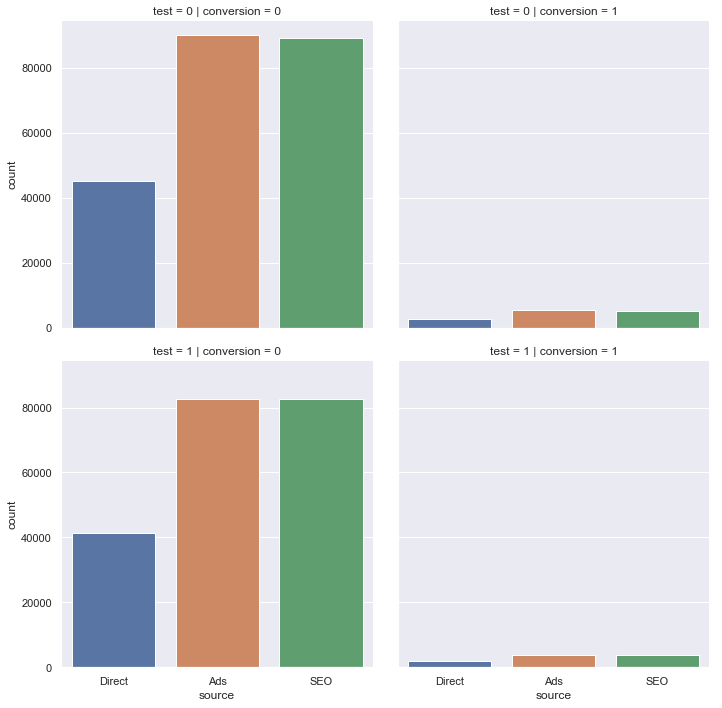

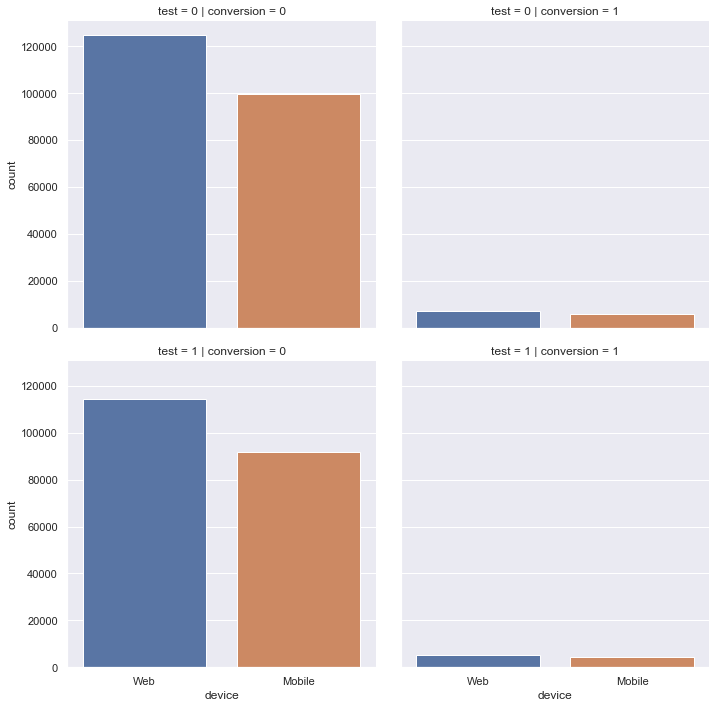

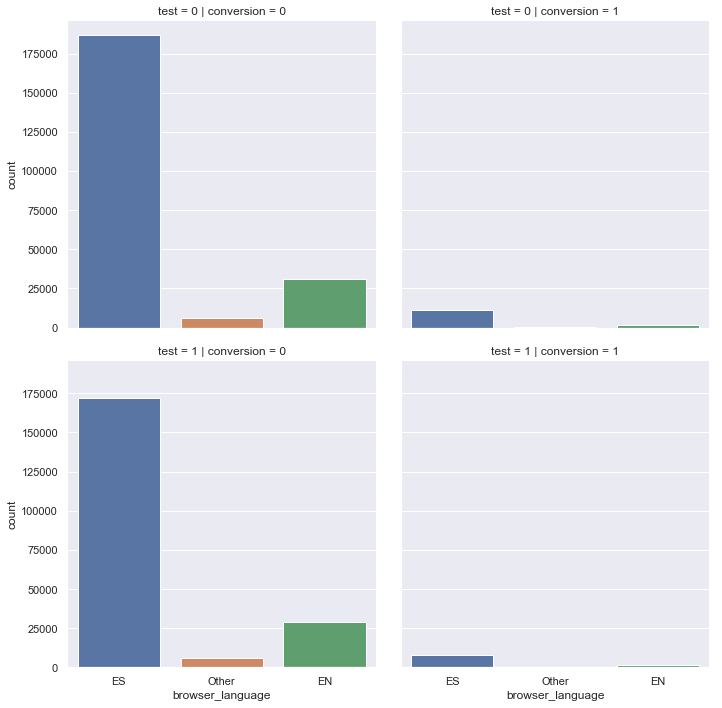

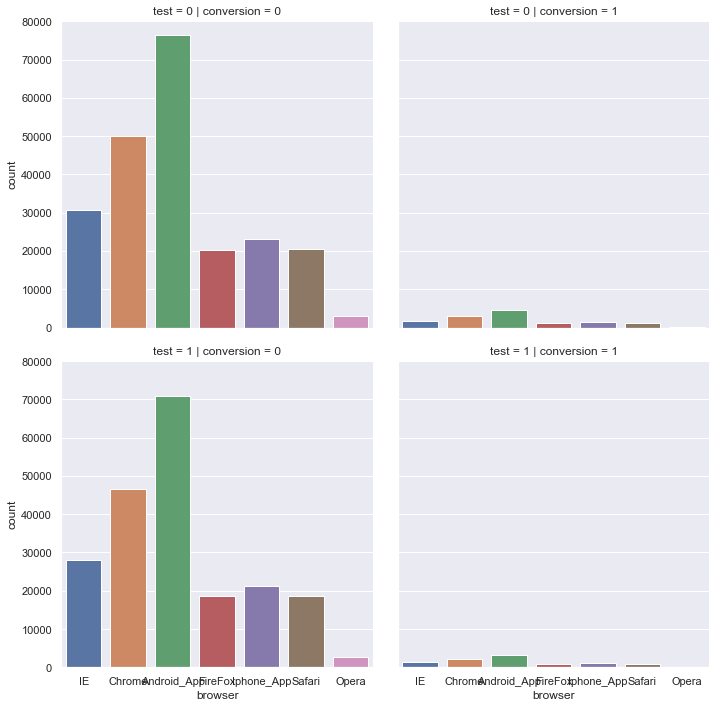

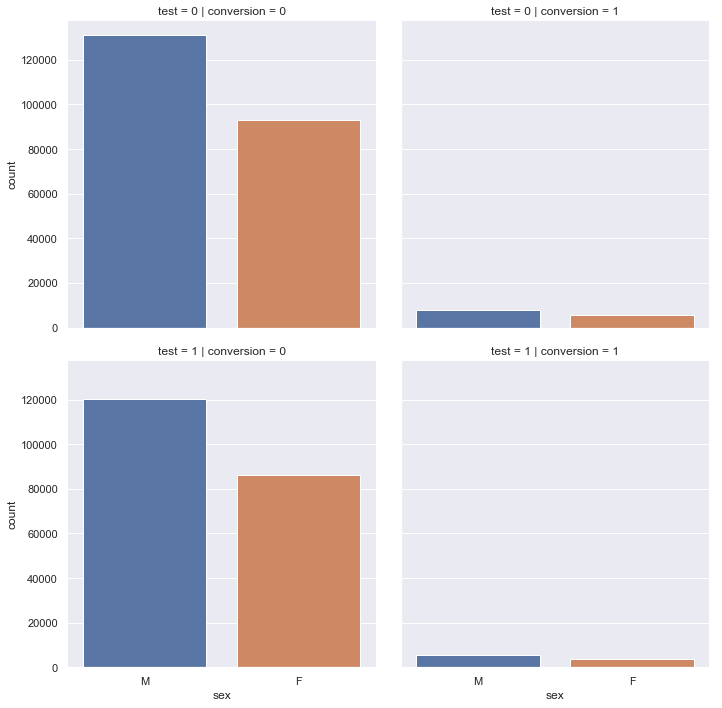

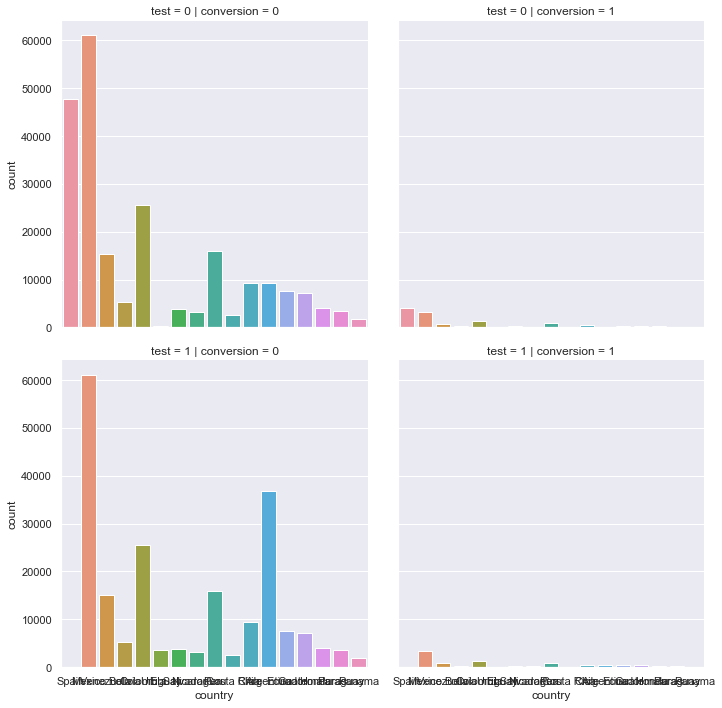

In [11]:
sns.set(style = 'darkgrid')

for col in ['source', 'device', 'browser_language', 'browser', 'sex', 'country']:
    graph = sns.catplot(x = col
                        , row = 'test', col = 'conversion', data= final_df, kind = 'count')

Just by looking at the plots -- it seems like that test didn't make things worse: <br>
i.e. __whether they are in test or not does not seem to have an impact on result__

# Verify Results of A/B Testing

Now let's verify the results of A/B testing and see if it actually makes things worse, we want to check: <br>
- Going back to the original problem, if Spanish has higher conversion rate
- If the test had made things worse, which doesn't seem to be so given by the count plots above

## Check if Spain has a high conversion rate

In [12]:
final_df[final_df.test == 0].groupby('country')['conversion'].mean().sort_values(ascending = False)

country
Spain          0.079719
El Salvador    0.053554
Nicaragua      0.052647
Costa Rica     0.052256
Colombia       0.052089
Honduras       0.050906
Guatemala      0.050643
Venezuela      0.050344
Peru           0.049914
Mexico         0.049495
Bolivia        0.049369
Ecuador        0.049154
Paraguay       0.048493
Chile          0.048107
Panama         0.046796
Argentina      0.015071
Uruguay        0.012048
Name: conversion, dtype: float64

__Remember to take `test = 1` out, we just want o see before using any tests, true Spain converts much better than the rest of LatAm Countries__

As shown above, Spain does have higher conversion rate than all other countries

## Check if the test is actually negative

__The book suggests to following logic flow (which is helpful than how I did it here)__:
1. Calculate the overall all countries test result as a whole
2. See if that actually made things worse (& in this case, the result should be yes)
3. Look over it by date, and see if it varies drastically
4. Look over it by country, and find out different things (I'm here 1st step -- this can be risky, and seems to be less structured than what the book suggests)

__Following logic flow of the book:__

### Calculate overall countries test results <br>
Steps: <br>
1. Take out `'Spain'`
2. Show `'test'` and `'conversion'`

In [13]:
overall_test_result = final_df[final_df.country != 'Spain'][['test','conversion']]
overall_test_result.head()

,test,conversion
1,1,0
3,1,0
4,1,0
5,1,0
6,0,0


Calling `stats` package for t test:

---
__Note here what to test for__:

We want to understand whether the test had an impact on actual conversion: i.e. if `test==1` or `test==0` made an actual difference in `'conversion'`.

In [14]:
from scipy.stats import ttest_ind, t
from math import sqrt

sample_1 = overall_test_result.conversion[overall_test_result.test ==1]
sample_2 = overall_test_result.conversion[overall_test_result.test ==0]

t_val, p_val = ttest_ind(sample_1, 
                       sample_2, equal_var = False)

print('\t t-value of test result is %s' % t_val, '\n',
      '\t p-value of test result is %s' % p_val)

	 t-value of test result is -7.353895203080277 
 	 p-value of test result is 1.9289178577799033e-13


We can get more info using `statsmodels`:

In [15]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

d1 = DescrStatsW(overall_test_result.conversion[overall_test_result.test ==1])
d2 = DescrStatsW(overall_test_result.conversion[overall_test_result.test ==0])

t_val, p_val, df = CompareMeans(d1, d2).ttest_ind(usevar = 'unequal')

lower_conf, upper_conf = CompareMeans(d1, d2).tconfint_diff( alpha = 0.05, usevar = 'unequal')

print(t_val, p_val, lower_conf, upper_conf)

-7.353895203080226 1.9289178577806492e-13 -0.006181420719843093 -0.0035798370383017964


In this case, p-value is significant, meaning that we need to reject null hypothesis, i.e. __the difference between the means is statistically significant__. Translating this back to business language, meaning that it is highly likely that test has resulted in a change in conversion rate.

We can also peak at summary for the results using `groupby` and `agg()` function (similar as above, __note that we are looking for avg(conversion) for `test==0` or `test==1` and see if there is a statistical difference__:

In [16]:
final_df.groupby('test')['conversion'].agg(['mean','count'])

,mean,count
test,,
0,0.055156,237093
1,0.043411,215774


This gives us a change from 4.8% for users that are not in the test group v.s. 4.3% for users that are in the test group (i.e., a ~10% drop) which is very huge. Note that the book says: <br>
__In data science, whenever results appear too bad or too god to be true, they are not true.__ <br>
Which kinds of make sense here, if you think about it -- it's very not likely that a locally translated page can cause such a drastic change in purchasing behavior

### Breakdown by dates to see if any potential date might change cause this change

/Users/yigongzhang/miniconda3/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


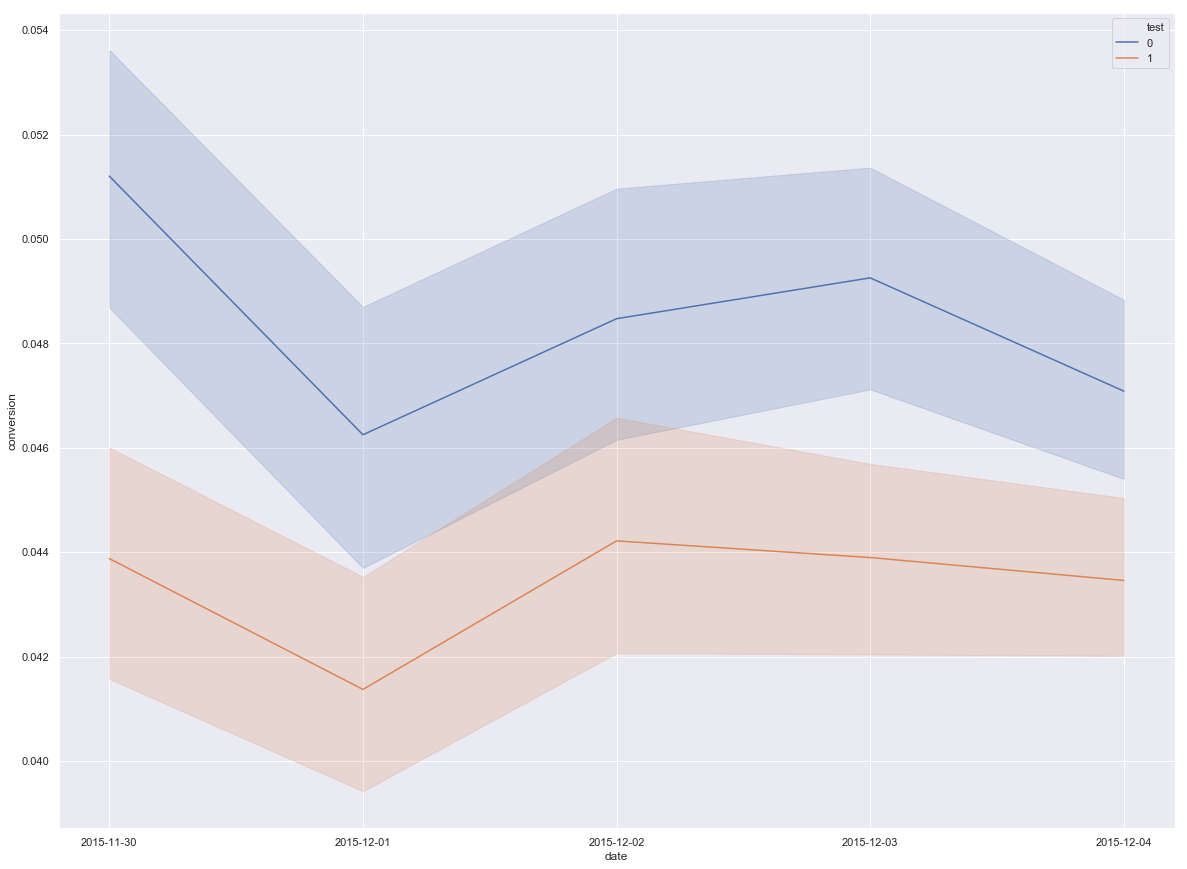

In [17]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize = [20,15])
sns.lineplot(ax = ax, 
             x = 'date', y='conversion', hue = 'test', data = final_df[final_df['country'] != 'Spain'])

This doesn't seem to vary a lot by date

Also, we can see that:
- Users in the test are constantly performing worse than users that are not in the test and there is relatively little variance across days. This probably means that we do not have enough data, but there was some bias in the experiment set up.
- On a side note, we just ran it for 5 days. We should always run the test for at least 1 full week to capture weekly patterns, 2 weeks would be much better.

### Breakdown by countries to see what's going on in there

Here the book suggests to find out where bias is coming from, ideally the distribution of people in test and control for each segment should be the same. The author __suggests to build a decision tree using `country` to predict `test` in 0 or 1, if it randomizes perfectly, the result should be 50% / 50% (btw, brilliant way!)__. <br>
Here, i just break them out by `country` and `test`, which achieves the same thing:

In [18]:
final_df.groupby(['country','test'])['conversion'].agg(['mean','count']).drop('Spain', axis = 0)

mean  count
country     test                 
Argentina   0     0.015071   9356
            1     0.013725  37377
Bolivia     0     0.049369   5550
            1     0.047901   5574
Chile       0     0.048107   9853
            1     0.051295   9884
Colombia    0     0.052089  27088
            1     0.050571  26972
Costa Rica  0     0.052256   2660
            1     0.054738   2649
Ecuador     0     0.049154   8036
            1     0.048988   7859
El Salvador 0     0.053554   4108
            1     0.047947   4067
Guatemala   0     0.050643   7622
            1     0.048647   7503
Honduras    0     0.050906   4361
            1     0.047540   4207
Mexico      0     0.049495  64209
            1     0.051186  64275
Nicaragua   0     0.052647   3419
            1     0.054177   3304
Panama      0     0.046796   1966
            1     0.049370   1985
Paraguay    0     0.048493   3650
            1     0.049229   3697
Peru        0     0.049914  16869
            1     0.050604  16797
Uruguay     0     0.012048    415
            1     0.012907   3719
Venezuela   0     0.050344  16149
            1     0.048978  15905

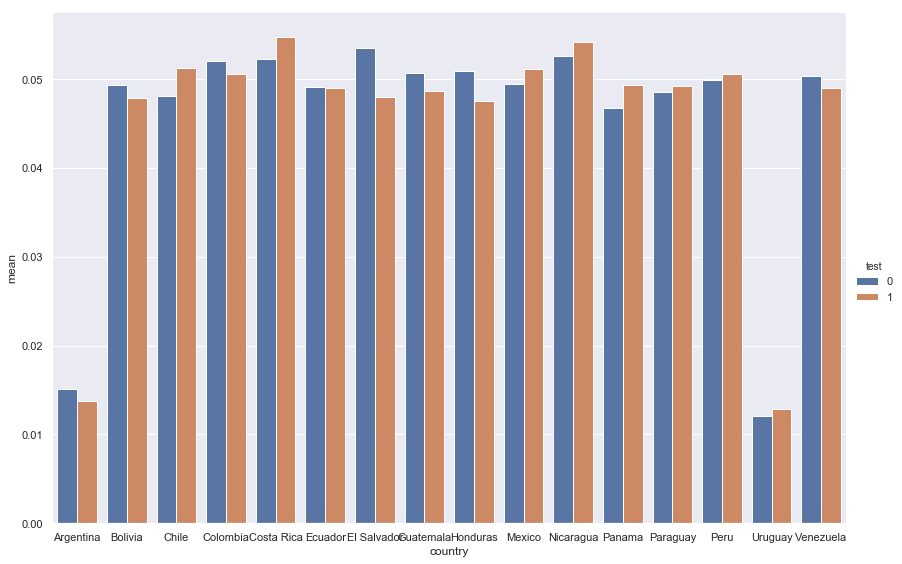

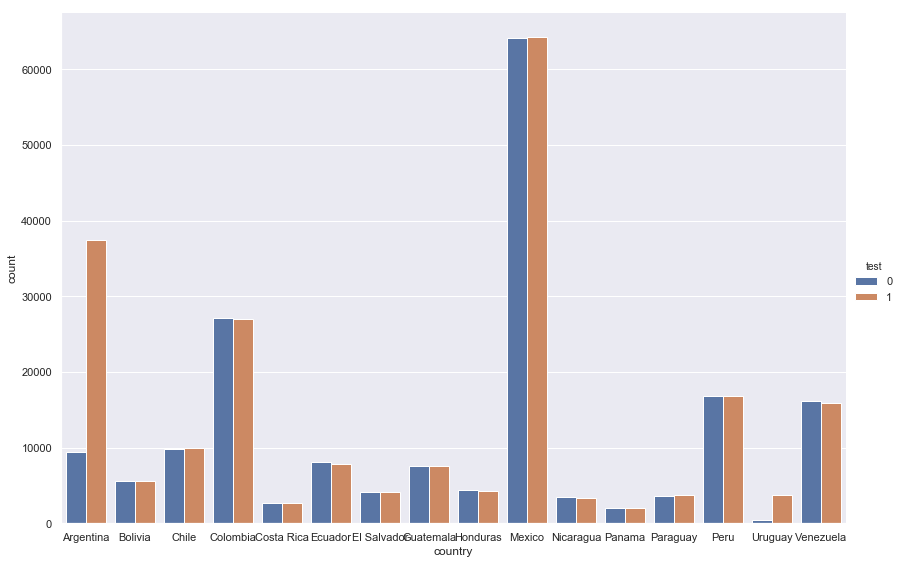

In [19]:
for col in ['mean','count']:
    sns.catplot(x = 'country', y = col, hue = 'test', kind = 'bar', height = 8, aspect = 1.5,
                data = final_df.groupby(
                    ['country','test'])['conversion'].agg(['mean','count']).drop('Spain', axis = 0).reset_index())

Actually here, you can see that the sample size of Argentina and Uruguay is not balanced

Additionally, we can calculate the test result at `country` level, and merge them into a data frame:

In [20]:
country_list = list(final_df.country.unique())
country_list.remove('Spain')

country_list

['Mexico',
 'Venezuela',
 'Bolivia',
 'Colombia',
 'Uruguay',
 'El Salvador',
 'Nicaragua',
 'Peru',
 'Costa Rica',
 'Chile',
 'Argentina',
 'Ecuador',
 'Guatemala',
 'Honduras',
 'Paraguay',
 'Panama']

In [21]:
t_val_list = []
p_val_list = []
df_list = []
lower_conf_list = []
upper_conf_list = []

for col in country_list:
    sample_1 = final_df[(final_df.country == col) & (final_df.test ==1)].conversion
    sample_2 = final_df[(final_df.country == col) & (final_df.test ==0)].conversion
    d1 = DescrStatsW(sample_1)
    d2 = DescrStatsW(sample_2)
    
    if sample_1.count() == sample_2.count():
        t_val_c, p_val_c, df_c = CompareMeans(d1, d2).ttest_ind(usevar = 'pooled')
        lower_conf_c, upper_conf_c = CompareMeans(d1, d2).tconfint_diff( alpha = 0.05, usevar = 'unequal')
    else:
        t_val_c, p_val_c, df_c = CompareMeans(d1, d2).ttest_ind(usevar = 'unequal')
        lower_conf_c, upper_conf_c = CompareMeans(d1, d2).tconfint_diff( alpha = 0.05, usevar = 'unequal')
        
    t_val_list.append(t_val_c)
    p_val_list.append(p_val_c)
    df_list.append(df_c)
    lower_conf_list.append(lower_conf_c)
    upper_conf_list.append(upper_conf_c)


    
test_result = pd.DataFrame(data = 
                          {'country_name': country_list,
                           't_value':t_val_list, 
                           'p_value': p_val_list,
                           'df': df_list,
                           'lower_ci': lower_conf_list,
                           'upper_ci': upper_conf_list,
                          }
                          )

test_result

,country_name,t_value,p_value,df,lower_ci,upper_ci
0,Mexico,1.386674,0.165544,128453.540235,-0.000699,0.004083
1,Venezuela,-0.562614,0.573702,32051.845412,-0.006122,0.003391
2,Bolivia,-0.359958,0.718885,11118.137084,-0.009465,0.006528
3,Colombia,-0.799992,0.423719,54052.913927,-0.005239,0.002202
4,Uruguay,0.151343,0.879764,517.743373,-0.010286,0.012003
5,El Salvador,-1.154994,0.248127,8158.417864,-0.015124,0.003909
6,Nicaragua,0.278809,0.780400,6705.720949,-0.009226,0.012286
7,Peru,0.289824,0.771953,33660.087814,-0.003978,0.005358
8,Costa Rica,0.401761,0.687876,5303.406161,-0.009629,0.014593
9,Chile,1.030373,0.302848,19720.351767,-0.002876,0.009252


Now if we add conversion rate back to the `test_result` table:

In [22]:
conversion_control = final_df[final_df.test == 0].groupby(['country'])['conversion'].mean()
conversion_test = final_df[final_df.test ==1].groupby('country')['conversion'].mean()

test_result = test_result.merge(pd.concat([conversion_control, conversion_test], join = 'inner', axis = 1, 
          keys = ['conversion_control', 'conversion_test']), how = 'inner', 
                  left_on = 'country_name', right_on = 'country')

test_result.sort_values(by = 'p_value')

,country_name,t_value,p_value,df,lower_ci,upper_ci,conversion_control,conversion_test
0,Mexico,1.386674,0.165544,128453.540235,-0.000699,0.004083,0.049495,0.051186
5,El Salvador,-1.154994,0.248127,8158.417864,-0.015124,0.003909,0.053554,0.047947
9,Chile,1.030373,0.302848,19720.351767,-0.002876,0.009252,0.048107,0.051295
10,Argentina,-0.963833,0.335147,13931.462938,-0.004082,0.001391,0.015071,0.013725
3,Colombia,-0.799992,0.423719,54052.913927,-0.005239,0.002202,0.052089,0.050571
13,Honduras,-0.720133,0.471463,8565.893533,-0.012528,0.005796,0.050906,0.047540
12,Guatemala,-0.564963,0.572107,15122.833915,-0.008920,0.004928,0.050643,0.048647
1,Venezuela,-0.562614,0.573702,32051.845412,-0.006122,0.003391,0.050344,0.048978
8,Costa Rica,0.401761,0.687876,5303.406161,-0.009629,0.014593,0.052256,0.054738
15,Panama,0.378167,0.705327,3948.014089,-0.010774,0.015923,0.046796,0.049370


Now, you can see if we control for country, the test result appears not to be significant -- so now we know that at least we didn't make it worse